In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
dataset=pd.read_csv("train.csv")

In [3]:
dataset.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0,5,27,32


In [4]:
dataset.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


Extract hours and months features from datetime column 

In [5]:
dataset["hour"]=pd.DataFrame(dataset.datetime.apply(lambda x:x.split()[1].split(":")[0]))
dataset['hour'] = dataset['hour'].astype('int64')
dataset["month"]=pd.DataFrame(dataset.datetime.apply(lambda x:x.split()[0].split("-")[1]))
dataset['month'] = dataset['month'].astype('int64')
dataset=dataset[['season','holiday','workingday','weather','hour','month','temp','humidity','windspeed','count']]
dataset.describe()

,season,holiday,workingday,weather,hour,month,temp,humidity,windspeed,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,11.541613,6.521495,20.23086,61.886460,12.799395,191.574132
std,1.116174,0.166599,0.466159,0.633839,6.915838,3.444373,7.79159,19.245033,8.164537,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.82000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,6.000000,4.000000,13.94000,47.000000,7.001500,42.000000
50%,3.000000,0.000000,1.000000,1.000000,12.000000,7.000000,20.50000,62.000000,12.998000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,18.000000,10.000000,26.24000,77.000000,16.997900,284.000000
max,4.000000,1.000000,1.000000,4.000000,23.000000,12.000000,41.00000,100.000000,56.996900,977.000000


Filter out the outlier data

In [6]:
upper_bound=dataset['count'].mean()+3*dataset['count'].std()
lower_bound=dataset['count'].mean()-3*dataset['count'].std()
dataset=dataset[dataset["count"]<upper_bound]
dataset=dataset[dataset["count"]>lower_bound]

In [7]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

Adding dummy varibles for categorical feature 'season'  'holiday'  'workingday'  'weather'  'hour'  'month'

In [8]:
labelencoder = LabelEncoder()
onehotencoder = OneHotEncoder(categorical_features = range(6))
X = onehotencoder.fit_transform(X).toarray()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [10]:
def ErrorRate(test,pred):
    avg=[1]*len(test)
    for i in range(len(test)):
        try:
            avg[i]=abs(float(test[i]) - float(pred[i]))/float(test[i])
        except ZeroDivisionError,e:
            print e.message
    avg=np.array(avg)
    return avg.mean()

In [11]:
linreg = LinearRegression()
scores = cross_val_score(linreg, X_test,y_test, cv=10)
print "Cross validation scores:",scores

Cross validation scores: [ 0.58255357  0.57289505  0.64241995  0.59190076  0.66598944  0.59132919
  0.64471031  0.6490007   0.64190622  0.60148136]


In [12]:
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)
y_pred[y_pred<0]=0
print "MSE:",metrics.mean_squared_error(y_test, y_pred)
print "Error rate:",ErrorRate(y_test,y_pred)

MSE: 10011.3362294
Error rate: 1.2935881294


Normal multiple linear regression didn't give a satisfactory R2 score and MSE

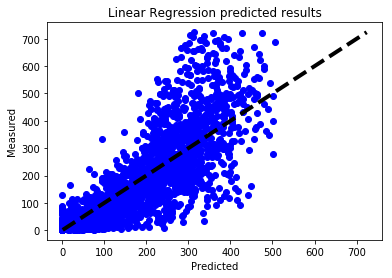

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(y_pred,y_test,color='b')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.ylabel('Measured')
plt.xlabel('Predicted')
plt.title("Linear Regression predicted results")
plt.show()

Trying ridge regression and applying GridSearchCV for optimal  alpha

In [14]:
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
forest_reg = linear_model.Ridge()
param_test=[{'alpha':[0.5,1,1.5,2,5,10]}]
gsearch = GridSearchCV(forest_reg, param_test, cv=5,return_train_score=True)
gsearch.fit(X_train,y_train)
print gsearch.best_params_, gsearch.best_score_

{'alpha': 1.5} 0.624042503584


In [15]:
reg=linear_model.Ridge(alpha=1.5)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print "MSE:",metrics.mean_squared_error(y_test, y_pred)
print "Error rate:",ErrorRate(y_test,y_pred)

MSE: 10331.7595416
Error rate: 2.35858189155


Trying poly linear regression with 'hour' measure 

In [16]:
dataset=pd.read_csv("train.csv")
dataset["hour"]=pd.DataFrame(dataset.datetime.apply(lambda x:x.split()[1].split(":")[0]))
dataset['hour'] = dataset['hour'].astype('int64')
dataset['square of hour']=dataset.hour.values**2
dataset['cube of hour']=dataset.hour.values**3
dataset=dataset[['hour','square of hour','cube of hour','count']]
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [19]:
linreg = LinearRegression()

In [20]:
scores = cross_val_score(linreg, X_test,y_test, cv=10)
print "Cross validation scores:",scores

Cross validation scores: [ 0.40211768  0.37545973  0.2889311   0.48806122  0.36187756  0.38482698
  0.34199924  0.3731043   0.35835942  0.3766743 ]


In [21]:
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)
y_pred[y_pred<0]=0
print "Hour Polynomial Regression MSE:",metrics.mean_squared_error(y_test, y_pred)
print "Error rate:",ErrorRate(y_test,y_pred)

Hour Polynomial Regression MSE: 20698.3456185
Error rate: 2.49101714254


Trying multiple linear regression after backward backward elimination. (refer to BackwardElimination.ipynb)

In [22]:
dataset=pd.read_csv("train.csv")
dataset["hour"]=pd.DataFrame(dataset.datetime.apply(lambda x:x.split()[1].split(":")[0]))
dataset['hour'] = dataset['hour'].astype('int64')
dataset["month"]=pd.DataFrame(dataset.datetime.apply(lambda x:x.split()[0].split("-")[1]))
dataset['month'] = dataset['month'].astype('int64')
dataset=dataset[['season','holiday','workingday','weather','hour','month','temp','humidity','windspeed','count']]

upper_bound=dataset['count'].mean()+3*dataset['count'].std()
lower_bound=dataset['count'].mean()-3*dataset['count'].std()
dataset=dataset[dataset["count"]<upper_bound]
dataset=dataset[dataset["count"]>lower_bound]
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

    
labelencoder = LabelEncoder()
onehotencoder = OneHotEncoder(categorical_features = range(6))
X = onehotencoder.fit_transform(X).toarray()
X=np.delete(X,[2,10,11,23,26,37,38,39,41],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [23]:
linreg = LinearRegression()
scores = cross_val_score(linreg, X_test,y_test, cv=10)
print "Cross validation scores:",scores

Cross validation scores: [ 0.58685081  0.57321914  0.64492232  0.59054259  0.6651742   0.59081105
  0.64583497  0.64826673  0.64241573  0.60196084]


In [24]:
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)
y_pred[y_pred<0]=0
print "Hour Polynomial Regression MSE:",metrics.mean_squared_error(y_test, y_pred)
print "Error rate:",ErrorRate(y_test,y_pred)

Hour Polynomial Regression MSE: 10017.9679008
Error rate: 1.29489587664
